In [82]:
import pandas as pd
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", index_col="EmployeeNumber")

In [83]:
data.head(1)
data.columns
target=data.iloc[:,1]
target.values

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [84]:
data.dtypes
data.info()
data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [85]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

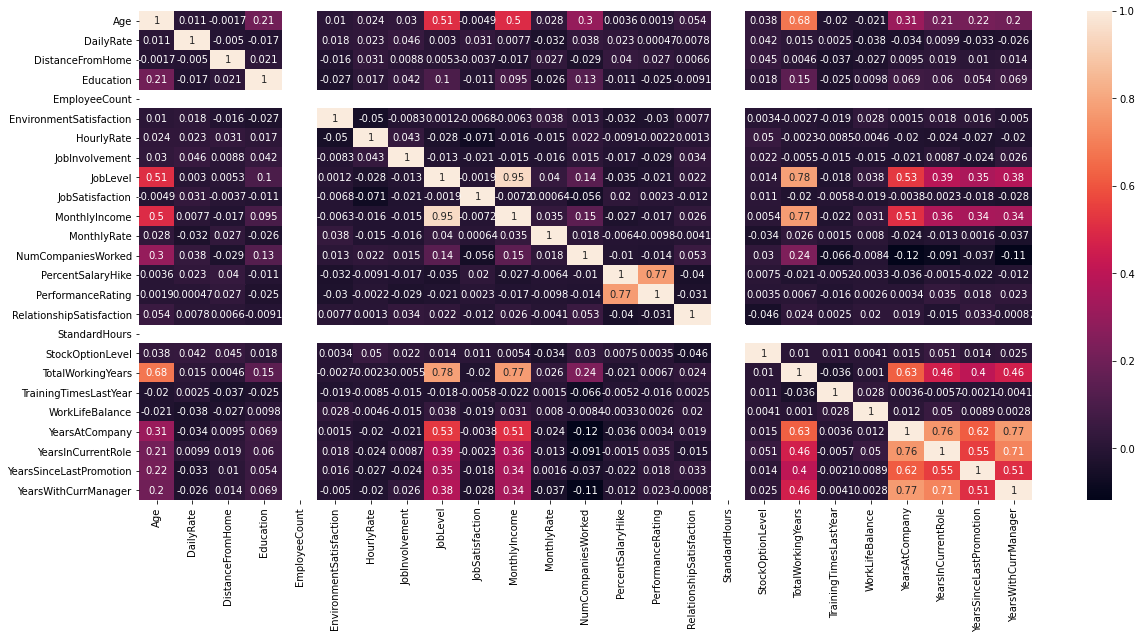

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,9))
corrmat=data.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=data.columns
for col in cols:
    data[col]=le.fit_transform(data[col])

In [88]:
from scipy.stats import zscore
zs=abs(zscore(data))
data_mod=data[data[(zs<3).all(axis=1)]]
data.shape, data_mod.shape

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


((1470, 34), (1470, 34))

In [90]:
from sklearn.model_selection import train_test_split as split
X=data.drop(columns=["Attrition"])
y=data.Attrition

In [91]:
X.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.112899
T

In [92]:
import numpy as np
columns=X.columns
for i in columns:
    if X[i].skew()>.55:
        X[i]=np.log1p(X[i])

In [93]:
X.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome           -0.246004
Education                  -0.289681
EducationField             -0.054786
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.219763
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          0.092896
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike          -0.281716
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.271963
TotalWorkingYears          -0.622798
T

In [94]:
X.drop(columns=["Over18", "StandardHours", "EmployeeCount"], inplace=True)

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif_score
vif= pd.DataFrame()
vif["features"]=X.columns
vif["VIF"]=[vif_score(X.values,i) for i in range(X.shape[1])]
vif[vif["VIF"]>15]

,features,VIF
22,TotalWorkingYears,49.223452
24,YearsAtCompany,42.758814


In [112]:
X.drop(columns=["TotalWorkingYears","YearsAtCompany"], inplace=True)

In [113]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(X)
X_mod=pd.DataFrame(df_x,columns=X.columns)

In [114]:
X_mod.shape, y.shape

((1470, 26), (1470,))

In [108]:
X_tr,X_te, y_tr, y_te=split(X_mod,y,test_size=.2,random_state=123)

In [110]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_tr, y_tr)
lr.score(X_tr, y_tr)
y_pred=lr.predict(X_te)
print(accuracy_score(y_te, y_pred))

0.9115646258503401


In [121]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
model=[LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
for m in model:
    X_train, X_test, y_train, y_test=split(X_mod,y, random_state=123, test_size=.2)
    m.fit(X_train, y_train)
    m.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("for model:", m,"acc_score:", accuracy_score(y_test, y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("*********************************************")
    print()
    print()

for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) acc_score: 0.9047619047619048
mse: 0.09523809523809523
rmse: 0.3086066999241838
*********************************************


for model: GaussianNB(priors=None, var_smoothing=1e-09) acc_score: 0.8843537414965986
mse: 0.11564625850340136
rmse: 0.3400680204068024
*********************************************


for model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) acc_score: 0.8979591836734694
mse: 0.10204081632653061
rmse: 0.31943828249996997
*********

In [117]:
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression()
parameters={"random_state" : range(42,200)}
clf=GridSearchCV(lr, parameters)
clf.fit(X_tr,y_tr)
clf.best_params_

{'random_state': 42}

In [122]:
lr=LogisticRegression()
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=42, test_size=.2)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
y_pred=lr.predict(X_test)
print("for model:", m,"acc_score:", accuracy_score(y_test, y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

for model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) acc_score: 0.8877551020408163
mse: 0.11224489795918367
rmse: 0.33502969713024494


In [123]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X_mod, y, cv=10, scoring="accuracy").mean()

0.8707482993197277